In [1]:
#Import Numpy and Pandas Package
import numpy as np
import pandas as pd


In [2]:
#import csv file in Data named variable 
data = pd.read_csv(r"C:\Users\ASHISH\OneDrive\Desktop\New folder (2)\Project\advertising\advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Inspection

In [3]:
#cheking data shape (numer of columns and rows)
data.shape

(200, 4)

In [4]:
#cheking information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#describe the data such as (mean, median,mode)
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data cleaning

In [6]:
#cheking null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
#import package for data visulization
import matplotlib.pyplot as plt
import seaborn as sns

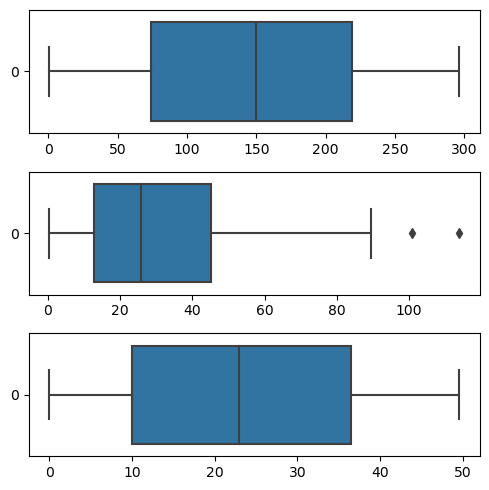

In [8]:
#Outlier Analysis
fig,axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(data["TV"],ax = axs[0],orient="h")
plt2 = sns.boxplot(data["Newspaper"],ax = axs[1],orient="h")
plt3 = sns.boxplot(data["Radio"],ax = axs[2],orient="h")
plt.tight_layout()

In [9]:
# there are no considerable outliers present in the data

# Exploratory data analysis

## Univariate Analysis

### sales (target variable)

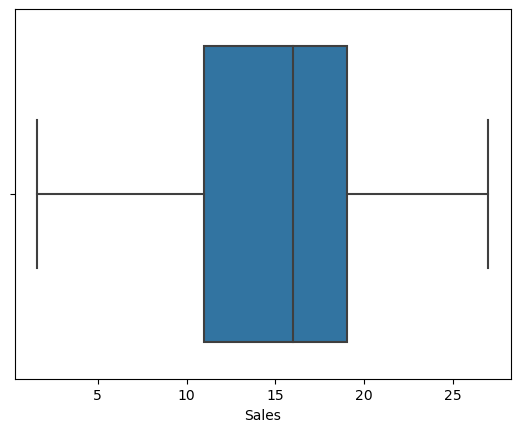

In [10]:
sns.boxplot(x="Sales",data=data,orient="h")
plt.show()

C:\Users\ASHISH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


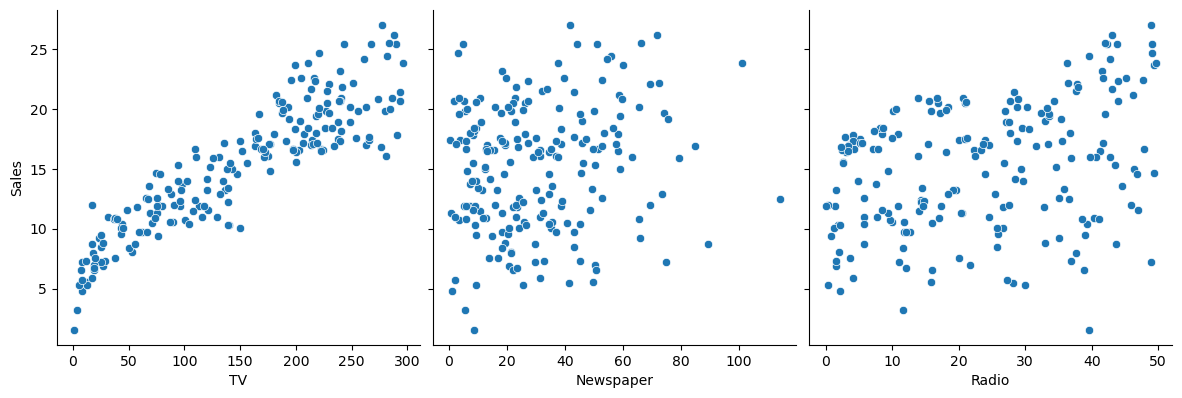

In [11]:
#seeing how sales are related with each other variable using scatter plot
sns.pairplot(data,x_vars=["TV","Newspaper","Radio"],y_vars="Sales",height=4,aspect=1,kind="scatter")
plt.show()

In [12]:
#correlation between diff variables.


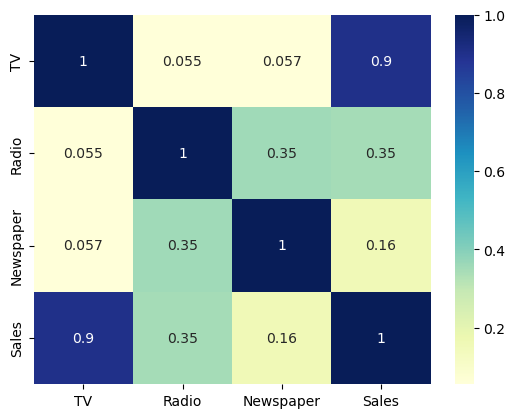

In [13]:
# use heatmap to see correlation betwen columns
sns.heatmap(data.corr(),cmap="YlGnBu" , annot =  True)
plt.show()

# Model Building

#### performing simple Linear regression

In [14]:
#declaire variable x and y for test_train_model
X = data["TV"]
Y = data["Sales"]

In [15]:
#import pacage for train test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.3,test_size=100)

#### Building Linear Model

In [16]:
import statsmodels.api as sm

In [17]:
#add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fit the regression line using "OLS"
lr = sm.OLS(Y_train,X_train_sm).fit()

In [18]:
#print the parameter
lr.params

const    7.049099
TV       0.056517
dtype: float64

In [19]:
#list out all the diff parameters of regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     252.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.36e-23
Time:                        18:11:54   Log-Likelihood:                -133.58
No. Observations:                  60   AIC:                             271.2
Df Residuals:                      58   BIC:                             275.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0491      0.610     11.553      0.0

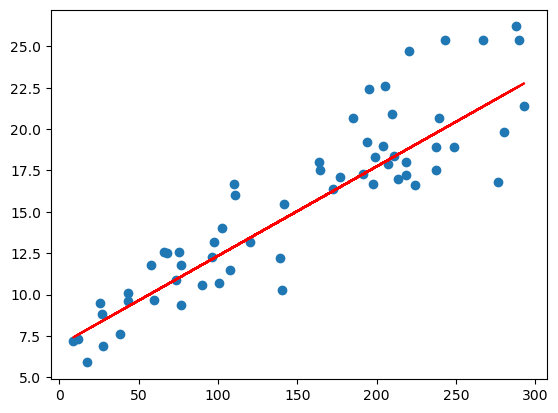

In [20]:
#scatter plat
plt.scatter(X_train,Y_train)
plt.plot(X_train,6.948 + 0.054*X_train,"r")
plt.show()

# Model Evaluation

In [21]:
#plot histogram to check the distribution of data 
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)


C:\Users\ASHISH\AppData\Local\Temp\ipykernel_19104\1725670316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins = 15)


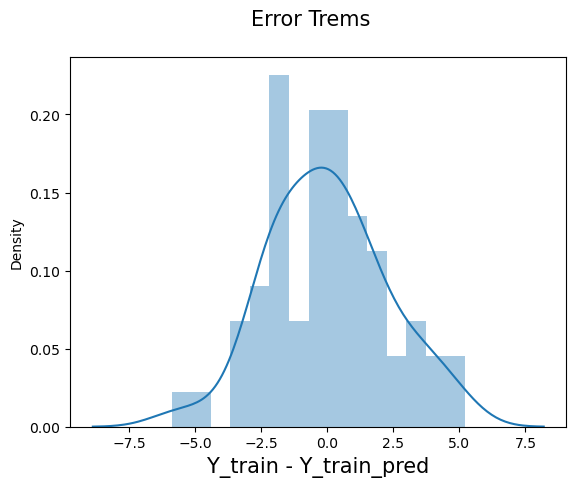

In [22]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle("Error Trems", fontsize = 15)
plt.xlabel("Y_train - Y_train_pred",fontsize = 15)
plt.show()

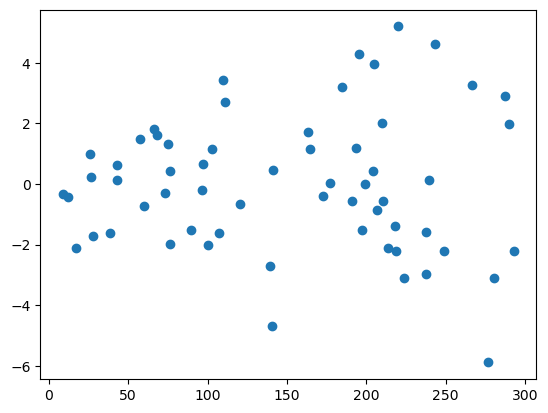

In [23]:
#looking for pattern in residuals
plt.scatter(X_train,res)
plt.show()

#### prediction on the test set

In [24]:
#add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# predict the y value corresponding to x_test_sm
Y_pred = lr.predict(X_test_sm)

In [25]:
Y_pred.head()

186    14.933205
54     21.896085
114    11.468719
53     17.369083
35     23.478558
dtype: float64

In [26]:
#import sklearn pakages fot error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
#return the mean_squared_error we'll take square root
np.sqrt(mean_squared_error(Y_test,Y_pred))

2.3563620902446587

#### cheking the R-squared on the test set

In [28]:
r_squared = r2_score(Y_test,Y_pred)
r_squared

0.7984566574099563

In [29]:
#visualizing the fit on test set

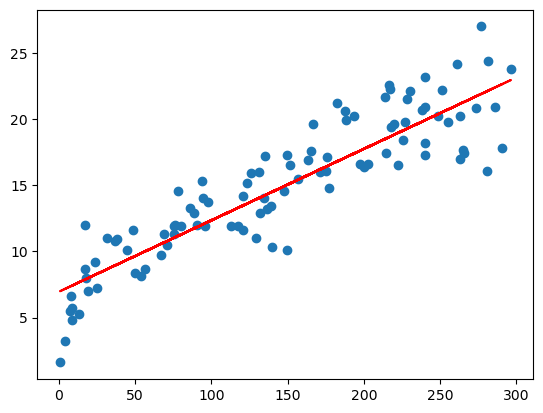

In [30]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,6.948+0.054*X_test,"r")
plt.show()